In [2]:
import pandas as pd
import numpy as np

In [3]:
import allel # ref - https://scikit-allel.readthedocs.io/en/stable/io.html#variant-call-format-vcf

In [4]:
vcf_folder = "../dataset/"
vcf_file_freebayes = "real1-freebayes.vcf.gz"
vcf_file_mutect = "real1-mutect2.vcf.gz"
vcf_file_vardict = "real1-vardict.vcf.gz"
vcf_file_varscan = "real1-varscan.vcf.gz"

In [5]:
df_freebayes = allel.vcf_to_dataframe(vcf_folder + vcf_file_freebayes)

In [6]:
df_freebayes.head()

,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,FILTER_PASS
0,1,10177,rs367896724,A,AC,NaN,NaN,46.599998,False
1,1,10583,rs58108140,G,A,NaN,NaN,271.100006,False
2,1,12783,rs62635284,G,A,NaN,NaN,2044.599976,False
3,1,13116,rs62635286,T,G,NaN,NaN,1762.699951,False
4,1,13118,rs62028691,A,G,NaN,NaN,1762.699951,False


In [7]:
df_mutect = allel.vcf_to_dataframe(vcf_folder + vcf_file_mutect)
df_mutect.head()

,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,FILTER_PASS
0,1,13110,rs540538026,G,A,NaN,NaN,NaN,True
1,1,13649,rs879707275,G,C,NaN,NaN,NaN,False
2,1,13813,.,T,G,NaN,NaN,NaN,False
3,1,13838,rs28428499,C,T,NaN,NaN,NaN,False
4,1,15015,.,G,C,NaN,NaN,NaN,True


In [8]:
df_vardict = allel.vcf_to_dataframe(vcf_folder + vcf_file_vardict)
df_vardict.head()

,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,FILTER_PASS
0,1,10230,rs775928745,AC,A,NaN,NaN,106.0,False
1,1,10231,rs200279319,C,A,NaN,NaN,75.0,False
2,1,10250,.,ACCCTA,CCCT,NaN,NaN,42.0,False
3,1,10583,rs58108140,G,A,NaN,NaN,122.0,False
4,1,12783,rs62635284,G,A,NaN,NaN,190.0,False


In [9]:
df_varscan = allel.vcf_to_dataframe(vcf_folder + vcf_file_varscan)
df_varscan.head()

,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,FILTER_PASS
0,1,10146,rs779258992,AC,A,NaN,NaN,0.0,False
1,1,10153,.,A,AC,NaN,NaN,0.0,False
2,1,10177,rs367896724,A,AC,NaN,NaN,0.0,False
3,1,10230,rs775928745,AC,A,NaN,NaN,0.0,False
4,1,10237,.,A,AC,NaN,NaN,0.0,False


In [10]:
print(f"Real freebayes shape = {df_freebayes.shape}")
print(f"Real Mutect shape = {df_mutect.shape}")
print(f"Real Vardict shape = {df_vardict.shape}")
print(f"Real Varscan shape = {df_varscan.shape}")

Real freebayes shape = (4990758, 9)
Real Mutect shape = (112953, 9)
Real Vardict shape = (4830315, 9)
Real Varscan shape = (4920452, 9)


In [11]:
m1 = pd.merge(df_freebayes, df_mutect, on = ["CHROM", "POS"], how="outer", suffixes = ("_freebayes", "_mutect"))

In [12]:
m1.shape

(5097215, 16)

In [13]:
m2 = pd.merge(m1, df_vardict, on = ["CHROM", "POS"], how="outer")
m2.rename(columns={"ID": "ID_vardict", "REF": "REF_vardict", "ALT_1": "ALT_1_vardict", "ALT_2": "ALT_2_vardict", \
                  "ALT_3": "ALT_3_vardict", "QUAL": "QUAL_vardict", "FILTER_PASS": "FILTER_PASS_vardict"}, inplace=True)

In [14]:
m2.head()

,CHROM,POS,ID_freebayes,REF_freebayes,ALT_1_freebayes,ALT_2_freebayes,ALT_3_freebayes,QUAL_freebayes,FILTER_PASS_freebayes,ID_mutect,...,ALT_3_mutect,QUAL_mutect,FILTER_PASS_mutect,ID_vardict,REF_vardict,ALT_1_vardict,ALT_2_vardict,ALT_3_vardict,QUAL_vardict,FILTER_PASS_vardict
0,1,10177,rs367896724,A,AC,NaN,NaN,46.599998,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10583,rs58108140,G,A,NaN,NaN,271.100006,False,NaN,...,NaN,NaN,NaN,rs58108140,G,A,NaN,NaN,122.0,False
2,1,12783,rs62635284,G,A,NaN,NaN,2044.599976,False,NaN,...,NaN,NaN,NaN,rs62635284,G,A,NaN,NaN,190.0,False
3,1,13116,rs62635286,T,G,NaN,NaN,1762.699951,False,NaN,...,NaN,NaN,NaN,rs62635286,T,G,NaN,NaN,230.0,False
4,1,13118,rs62028691,A,G,NaN,NaN,1762.699951,False,NaN,...,NaN,NaN,NaN,rs62028691,A,G,NaN,NaN,233.0,False


In [15]:
m2.shape

(5412760, 23)

In [16]:
m3 = pd.merge(m2, df_varscan, on = ["CHROM", "POS"], how="outer")
m3.rename(columns={"ID": "ID_varscan", "REF": "REF_varscan", "ALT_1": "ALT_1_varscan", "ALT_2": "ALT_2_varscan", \
                  "ALT_3": "ALT_3_varscan", "QUAL": "QUAL_varscan", "FILTER_PASS": "FILTER_PASS_varscan"}, inplace=True)
m3.shape

(5790219, 30)

In [17]:
m3.head()

,CHROM,POS,ID_freebayes,REF_freebayes,ALT_1_freebayes,ALT_2_freebayes,ALT_3_freebayes,QUAL_freebayes,FILTER_PASS_freebayes,ID_mutect,...,ALT_3_vardict,QUAL_vardict,FILTER_PASS_vardict,ID_varscan,REF_varscan,ALT_1_varscan,ALT_2_varscan,ALT_3_varscan,QUAL_varscan,FILTER_PASS_varscan
0,1,10177,rs367896724,A,AC,NaN,NaN,46.599998,False,NaN,...,NaN,NaN,NaN,rs367896724,A,AC,NaN,NaN,0.0,False
1,1,10583,rs58108140,G,A,NaN,NaN,271.100006,False,NaN,...,NaN,122.0,False,rs58108140,G,A,NaN,NaN,0.0,False
2,1,12783,rs62635284,G,A,NaN,NaN,2044.599976,False,NaN,...,NaN,190.0,False,rs62635284,G,A,NaN,NaN,0.0,False
3,1,13116,rs62635286,T,G,NaN,NaN,1762.699951,False,NaN,...,NaN,230.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,13118,rs62028691,A,G,NaN,NaN,1762.699951,False,NaN,...,NaN,233.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
m3.head()[["CHROM", "POS", "FILTER_PASS_freebayes", "FILTER_PASS_mutect", "FILTER_PASS_vardict", "FILTER_PASS_varscan"]]

,CHROM,POS,FILTER_PASS_freebayes,FILTER_PASS_mutect,FILTER_PASS_vardict,FILTER_PASS_varscan
0,1,10177,False,NaN,NaN,False
1,1,10583,False,NaN,False,False
2,1,12783,False,NaN,False,False
3,1,13116,False,NaN,False,NaN
4,1,13118,False,NaN,False,NaN


In [19]:
df_merged = m3

In [20]:
# add third category instead of False?
df_merged["FILTER_PASS_freebayes"].fillna(False, inplace=True)
df_merged["FILTER_PASS_vardict"].fillna(False, inplace=True)
df_merged["FILTER_PASS_mutect"].fillna(False, inplace=True)
df_merged["FILTER_PASS_varscan"].fillna(False, inplace=True)
df_merged.head()[["CHROM", "POS", "FILTER_PASS_freebayes", "FILTER_PASS_mutect", "FILTER_PASS_vardict", "FILTER_PASS_varscan"]]

,CHROM,POS,FILTER_PASS_freebayes,FILTER_PASS_mutect,FILTER_PASS_vardict,FILTER_PASS_varscan
0,1,10177,False,False,False,False
1,1,10583,False,False,False,False
2,1,12783,False,False,False,False
3,1,13116,False,False,False,False
4,1,13118,False,False,False,False


In [21]:
truth = pd.read_csv(vcf_folder + "real1_truth.bed", sep = "\t", header = None)
truth.columns = ["CHROM", "POS_START", "POS_END"]
truth.head()

,CHROM,POS_START,POS_END
0,1,2180985,2180985
1,1,5035185,5035185
2,1,8881322,8881322
3,1,8929624,8929624
4,1,9196716,9196716


In [22]:
(truth.POS_START == truth.POS_END).sum()

1319

In [23]:
truth.shape

(1319, 3)

In [24]:
truth.merge(df_merged, left_on = ["CHROM", "POS_START"], right_on = ["CHROM", "POS"])
# this is smaller than the actual truth file indicating the all 4 variant callers missed to classify some true variants

,CHROM,POS_START,POS_END,POS,ID_freebayes,REF_freebayes,ALT_1_freebayes,ALT_2_freebayes,ALT_3_freebayes,QUAL_freebayes,...,ALT_3_vardict,QUAL_vardict,FILTER_PASS_vardict,ID_varscan,REF_varscan,ALT_1_varscan,ALT_2_varscan,ALT_3_varscan,QUAL_varscan,FILTER_PASS_varscan
0,1,2180985,2180985,2180985,.,A,G,NaN,NaN,1301.400024,...,NaN,193.0,True,.,A,G,NaN,NaN,0.0,False
1,1,5035185,5035185,5035185,rs578164071,C,T,NaN,NaN,279.399994,...,NaN,130.0,True,rs578164071,C,T,NaN,NaN,0.0,True
2,1,8881322,8881322,8881322,.,G,A,NaN,NaN,123.900002,...,NaN,93.0,True,.,G,A,NaN,NaN,0.0,False
3,1,8929624,8929624,8929624,.,A,G,NaN,NaN,93.900002,...,NaN,86.0,True,.,A,G,NaN,NaN,0.0,False
4,1,9196716,9196716,9196716,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,47.0,True,.,C,T,NaN,NaN,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,X,141680928,141680928,141680928,rs1047604339,C,A,NaN,NaN,39.400002,...,NaN,62.0,True,rs1047604339,C,A,NaN,NaN,0.0,True
1304,X,142275497,142275497,142275497,.,T,C,NaN,NaN,360.600006,...,NaN,131.0,True,.,T,C,NaN,NaN,0.0,False
1305,X,144737796,144737796,144737796,.,C,G,NaN,NaN,112.199997,...,NaN,97.0,True,.,C,G,NaN,NaN,0.0,True
1306,Y,15154839,15154839,15154839,.,G,C,NaN,NaN,379.500000,...,NaN,127.0,True,.,G,C,NaN,NaN,0.0,False


In [25]:
df_merged_with_truth = pd.merge(truth, df_merged, left_on=["CHROM", "POS_START"], right_on = ["CHROM", "POS"], how="outer")
df_merged_with_truth.head()

,CHROM,POS_START,POS_END,POS,ID_freebayes,REF_freebayes,ALT_1_freebayes,ALT_2_freebayes,ALT_3_freebayes,QUAL_freebayes,...,ALT_3_vardict,QUAL_vardict,FILTER_PASS_vardict,ID_varscan,REF_varscan,ALT_1_varscan,ALT_2_varscan,ALT_3_varscan,QUAL_varscan,FILTER_PASS_varscan
0,1,2180985.0,2180985.0,2180985.0,.,A,G,NaN,NaN,1301.400024,...,NaN,193.0,True,.,A,G,NaN,NaN,0.0,False
1,1,5035185.0,5035185.0,5035185.0,rs578164071,C,T,NaN,NaN,279.399994,...,NaN,130.0,True,rs578164071,C,T,NaN,NaN,0.0,True
2,1,8881322.0,8881322.0,8881322.0,.,G,A,NaN,NaN,123.900002,...,NaN,93.0,True,.,G,A,NaN,NaN,0.0,False
3,1,8929624.0,8929624.0,8929624.0,.,A,G,NaN,NaN,93.900002,...,NaN,86.0,True,.,A,G,NaN,NaN,0.0,False
4,1,9196716.0,9196716.0,9196716.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,47.0,True,.,C,T,NaN,NaN,0.0,True


In [26]:
df_merged_with_truth.shape

(5790230, 32)

In [27]:
def set_true_label(row):
    if str(row) == "nan":
        return False
    else:
        return True

In [28]:
df_merged_with_truth["truth"] = df_merged_with_truth["POS_START"].apply(lambda row:set_true_label(row))

In [29]:
extras_in_truth = df_merged_with_truth[df_merged_with_truth.POS.isna()].index
extras_in_truth

Int64Index([116, 126, 224, 250, 317, 700, 762, 886, 1149, 1157, 1316], dtype='int64')

In [30]:
df_merged_with_truth.drop(extras_in_truth, inplace=True)

In [31]:
df_merged_with_truth.isna().sum()

CHROM                          0
POS_START                5788911
POS_END                  5788911
POS                            0
ID_freebayes              799461
REF_freebayes             799461
ALT_1_freebayes           799461
ALT_2_freebayes          5662164
ALT_3_freebayes          5780010
QUAL_freebayes            799462
FILTER_PASS_freebayes          0
ID_mutect                5677201
REF_mutect               5677201
ALT_1_mutect             5677201
ALT_2_mutect             5790219
ALT_3_mutect             5790219
QUAL_mutect              5790219
FILTER_PASS_mutect             0
ID_vardict                933993
REF_vardict               933993
ALT_1_vardict             933993
ALT_2_vardict            5790219
ALT_3_vardict            5790219
QUAL_vardict              934423
FILTER_PASS_vardict            0
ID_varscan                844188
REF_varscan               844188
ALT_1_varscan             844188
ALT_2_varscan            5790219
ALT_3_varscan            5790219
QUAL_varsc

In [32]:
df_merged_with_truth["QUAL_freebayes"].fillna(df_merged_with_truth["QUAL_freebayes"].mean(), inplace=True)
df_merged_with_truth["QUAL_vardict"].fillna(df_merged_with_truth["QUAL_vardict"].mean(), inplace=True)

In [33]:
df_merged_with_truth["QUAL_mutect"].isna().sum()

5790219

In [34]:
df_merged_with_truth[["QUAL_freebayes", "QUAL_vardict"]].corr()

,QUAL_freebayes,QUAL_vardict
QUAL_freebayes,1.000000,0.327006
QUAL_vardict,0.327006,1.000000


#### Visualization

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [37]:
pca_df = pca.fit_transform(df_merged_with_truth[["FILTER_PASS_freebayes", 'FILTER_PASS_mutect', "FILTER_PASS_vardict", "FILTER_PASS_varscan"]])
pca_df.shape

(5790219, 2)

In [38]:
pca_df = pd.DataFrame(pca_df, columns = ["comp1", "comp2"])
pca_df["label"] = df_merged_with_truth["truth"]

In [39]:
pca_df.head()

,comp1,comp2,label
0,0.143949,1.414000,True
1,1.139042,1.324025,True
2,0.143949,1.414000,True
3,0.143949,1.414000,True
4,1.069692,0.980650,True


In [40]:
pca_df["label"].value_counts()

False    5788900
True        1308
Name: label, dtype: int64

<AxesSubplot:xlabel='comp1', ylabel='comp2'>

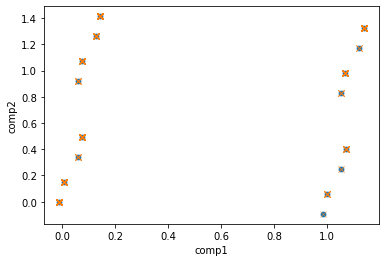

In [44]:
sns.scatterplot(data = pca_df[pca_df["label"] == 0], x = "comp1", y = "comp2", marker="o")
sns.scatterplot(data = pca_df[pca_df["label"] == 1], x = "comp1", y = "comp2", marker="x")

Text(0.5, 1.0, 'Correlation between outcomes of 4 variant callers and truth label - Real 1 dataset')

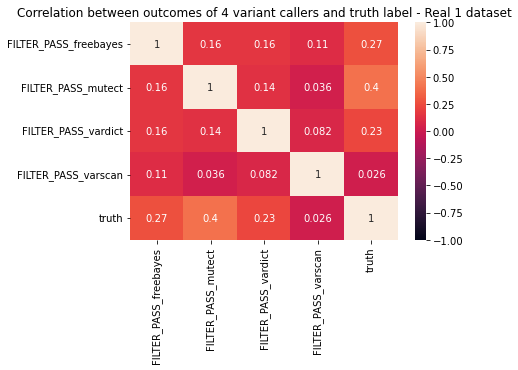

In [51]:
sns.heatmap(df_merged_with_truth[["FILTER_PASS_freebayes", 'FILTER_PASS_mutect', "FILTER_PASS_vardict", "FILTER_PASS_varscan", "truth"]].astype(int).corr(), annot=True, vmin=-1, vmax=1)
plt.title("Correlation between outcomes of 4 variant callers and truth label - Real 1 dataset")

In [53]:
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
chi2_fb, _,_,_ = chi2_contingency(confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_freebayes)))
chi2_mu, _,_,_ = chi2_contingency(confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_mutect)))
chi2_vd, _,_,_ = chi2_contingency(confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_vardict)))
chi2_vs, _,_,_ = chi2_contingency(confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_varscan)))

In [65]:
print("Freebayes")
chi2_contingency(confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_freebayes)))

Freebayes


(427973.33481017797,
 0.0,
 1,
 array([[5.77554402e+06, 1.33669797e+04],
        [1.30497974e+03, 3.02025882e+00]]))

In [66]:
print("Mutect")
chi2_contingency(confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_mutect)))

Mutect


(921857.2129482182,
 0.0,
 1,
 array([[5.78177961e+06, 7.13138867e+03],
        [1.30638867e+03, 1.61133180e+00]]))

In [67]:
print("Vardict")
chi2_contingency(confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_vardict)))

Vardict


(303510.91282570426,
 0.0,
 1,
 array([[5.76982031e+06, 1.90906865e+04],
        [1.30368647e+03, 4.31352597e+00]]))

In [68]:
print("Varscan")
chi2_contingency(confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_varscan)))

Varscan


(3952.5033603620814,
 0.0,
 1,
 array([[5.72572428e+06, 6.31867230e+04],
        [1.29372301e+03, 1.42769916e+01]]))

#### Confusion matrix comparing against truth

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
tn, fp, fn, tp = confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_freebayes)).ravel()
tn, fp, fn, tp

(5776680, 12231, 169, 1139)

In [71]:
# least false positives
tn, fp, fn, tp = confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_mutect)).ravel()
tn, fp, fn, tp

(5782998, 5913, 88, 1220)

In [72]:
tn, fp, fn, tp = confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_vardict)).ravel()
tn, fp, fn, tp

(5770963, 17948, 161, 1147)

In [73]:
tn, fp, fn, tp = confusion_matrix(list(df_merged_with_truth.truth), list(df_merged_with_truth.FILTER_PASS_varscan)).ravel()
tn, fp, fn, tp

(5725961, 62950, 1057, 251)

In [ ]:
def predict_label_three_best(row):
    if row["FILTER_PASS_mutect"] == False:
        return False
    if int(row["FILTER_PASS_freebayes"]) + int(row["FILTER_PASS_vardict"]) + int(row["FILTER_PASS_varscan"]) >= 2:
        return True
    return False

In [ ]:
df_merged_with_truth["three_best_mutect_true"] = df_merged_with_truth[["FILTER_PASS_freebayes", "FILTER_PASS_mutect", "FILTER_PASS_vardict", "FILTER_PASS_varscan"]].apply(predict_label_three_best, axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_merged_with_truth[["FILTER_PASS_mutect", "FILTER_PASS_freebayes", "FILTER_PASS_vardict", "FILTER_PASS_varscan"]], df_merged_with_truth["truth"], test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [43]:
from pgmpy.models import BayesianNetwork

In [44]:
bn = BayesianNetwork(
[
#     ("CHROM", "truth"),
#     ("POS", "truth"),
#     ("QUAL_freebayes", "truth"),
#     ("QUAL_vardict", "truth"),
    ("FILTER_PASS_mutect", "truth"),
    ("FILTER_PASS_freebayes", "truth"),
    ("FILTER_PASS_vardict", "truth"),
    ("FILTER_PASS_varscan", "truth"),
])

In [45]:
from pgmpy.estimators import MaximumLikelihoodEstimator

In [46]:
train_df = pd.DataFrame(X_train, columns = ["FILTER_PASS_mutect","FILTER_PASS_freebayes", "FILTER_PASS_vardict", "FILTER_PASS_varscan"])
train_df["truth"] = y_train
print(train_df.shape)
train_df.head()

(4632175, 5)


,FILTER_PASS_mutect,FILTER_PASS_freebayes,FILTER_PASS_vardict,FILTER_PASS_varscan,truth
1702698,False,False,False,False,False
4007430,False,False,False,False,False
1632922,False,False,False,False,False
2382596,False,False,False,False,False
2978855,False,False,False,False,False


In [47]:
bn.fit(
    data=train_df,
    estimator=MaximumLikelihoodEstimator
)

In [48]:
print(bn.get_cpds("truth"))

+-----------------------+-----+-----------------------------+
| FILTER_PASS_freebayes | ... | FILTER_PASS_freebayes(True) |
+-----------------------+-----+-----------------------------+
| FILTER_PASS_mutect    | ... | FILTER_PASS_mutect(True)    |
+-----------------------+-----+-----------------------------+
| FILTER_PASS_vardict   | ... | FILTER_PASS_vardict(True)   |
+-----------------------+-----+-----------------------------+
| FILTER_PASS_varscan   | ... | FILTER_PASS_varscan(True)   |
+-----------------------+-----+-----------------------------+
| truth(False)          | ... | 0.375                       |
+-----------------------+-----+-----------------------------+
| truth(True)           | ... | 0.625                       |
+-----------------------+-----+-----------------------------+


In [49]:
test_df = pd.DataFrame(X_test, columns = ["FILTER_PASS_mutect","FILTER_PASS_freebayes", "FILTER_PASS_vardict", "FILTER_PASS_varscan"])
test_df["truth"] = y_test
print(test_df.shape)
test_df.head()

(1158044, 5)


,FILTER_PASS_mutect,FILTER_PASS_freebayes,FILTER_PASS_vardict,FILTER_PASS_varscan,truth
359077,False,False,False,False,False
5016218,False,False,False,False,False
4612769,False,False,False,False,False
1484341,False,False,False,False,False
2266757,False,False,False,False,False


In [50]:
from pgmpy.inference import VariableElimination
from ipywidgets import FloatProgress

In [51]:
bn_infer = VariableElimination(bn)

In [52]:
from IPython.display import clear_output

In [53]:
def get_preds(row):
    prob = bn_infer.query(variables=["truth"], evidence={"FILTER_PASS_freebayes": row["FILTER_PASS_freebayes"], \
                                             "FILTER_PASS_mutect": row["FILTER_PASS_mutect"], \
                                             "FILTER_PASS_vardict": row["FILTER_PASS_vardict"], \
                                             "FILTER_PASS_varscan": row["FILTER_PASS_varscan"]}, show_progress=False)
#     clear_output(wait=True)
    if (prob.values[1]) > 0.5:
        return True
    else:
        return False

In [54]:
test_df["preds"] = test_df.apply(get_preds, axis = 1)

#### Metric evaluation

In [55]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(df_merged_with_truth["truth"], df_merged_with_truth["three_best_mutect_true"]))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00   5788911
        True       0.72      0.83      0.78      1308

    accuracy                           1.00   5790219
   macro avg       0.86      0.92      0.89   5790219
weighted avg       1.00      1.00      1.00   5790219



In [58]:
print(classification_report(test_df["truth"], test_df["preds"]))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1157769
        True       0.84      0.78      0.81       275

    accuracy                           1.00   1158044
   macro avg       0.92      0.89      0.90   1158044
weighted avg       1.00      1.00      1.00   1158044



In [67]:
df_merged_with_truth.shape

(5790219, 34)

In [68]:
df_merged_with_truth.to_pickle("real1_merged.pkl")